<font color="orange" size="5"><b>📗 Recherche textuelle : méthode naïve (partie 2)</b></font>

## 2.1 Cadre du problème et notations

Dans toute la suite on cherche donc la première occurrence d’un <font color='blue'>*motif*</font> de longueur $p$ dans un <font color='blue'>*texte*</font> de longueur $n$.


À un moment donné de la recherche, on observe une <font color='blue'>*fenêtre*</font> de taille $p$ du texte complet, sur laquelle on aligne le motif, et on regarde s'il y a bien correspondance.




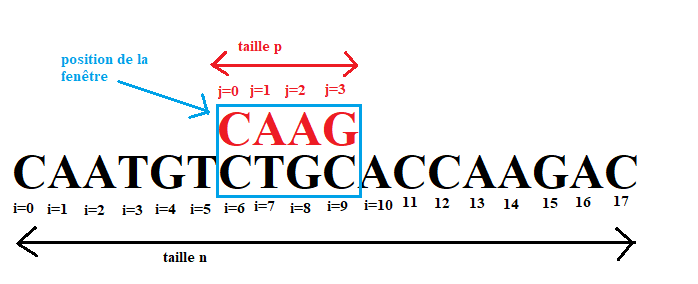

<font size="5">[l'algorithme en vidéo](https://youtu.be/wooreeILdS8)</font>

Dans cette vidéo on a utilisé des slice : `txt[idx:idx+4]`
  
Toutefois, nous avons déjà vu que le slicing induit des recopies de listes ou de chaînes.
Ici nous allons préférer itérer sur `idx`, comme dans la vidéo, puis sur l'indice `j` des caractères de motif.

Pour voir si on a trouvé un motif, on doit comparer uns à uns les caractères du motif à ceux qui leur font face dans le texte.

<font color='blue' size="4">Pour chaque position `idx`, et pour chaque indice `j` (position du caractère dans motif), on va comparer <b>`motif[j]`</b> à <b>`texte[idx + j]`</b></font>

<font color='blue' size="4">Les caractères du texte présents dans la fenêtre sont numérotés de `idx + 0` à `idx + 3`</font>


- Si la fenêtre présente un défaut de correspondance entre les caractères du texte et ceux du motif, on déplace la fenêtre. 
- Si le motif correspond parfaitement au texte dévoilé dans la fenêtre, on a trouvé une occurrence à la position i.

<font color='blue' size="4">Pour que la recherche puisse se faire, on doit avoir l'inégalité :  $\text{idx} \leq \text{len(txt)}-p$ </font>

## 2.2 Recherche naïve de correspondance

L’algorithme naïf consiste simplement à **comparer un à un, de gauche à droite**, les caractères du texte apparaissant dans la fenêtre avec ceux du motif. En cas de non-correspondance **on avance simplement la fenêtre d’une unité vers la droite**.


### a) Fonction correspondance

**<font color='orange'>💻 A vous de jouer 1 : compléter la fonction <code>correspondance(texte, motif, i)</code> </font>**

Cette fonction renvoie, pour une fenêtre en position $i$, un couple formé :
- d'un booléen <code>ok</code> qui vaut `True` si on a trouvé une occurrence du motif, et `False` sinon
- d'un entier <code>decalage</code> qui vaut toujours 1, sauf si on a trouvé une occurrence, auquel cas il vaut 0 puisque c'est fini. (En fait, cela n'a pas d'importance)

In [ ]:
# Correction
def correspondance(texte, motif, i):
    """
    Préconditions :
    - texte est de type str, motif de type str et i de type int
    - la somme de i et de la longueur de motif est inférieure ou égale à 
    la longueur de texte.

    Postconditions :
    La fonction renvoie un tuple formé 
    - d'un booléen : True si tous les caractères de motif correspondent aux 
    caractères de texte à partie de la position i, False sinon
    - d'un entier décalage (1 si on a trouvé un carctère non correspondant et 0 sinon)

    """
    
    p = len(motif)
    assert i + p <= len(texte)
    for j in range(p):
        if texte[i + j] != motif[j]:
            return (False, 1)
    # si on arrive ici c'est qu'il y a eu correspondance

    return (True, 0)

In [ ]:
texte = 'CAATGTCTGCACCAAGAC'
motif = 'CAAG'
assert correspondance(texte, motif, 0) == (False, 1)
assert correspondance(texte, motif,12) == (True, 0)



Vérification des préconditions :

In [ ]:
correspondance(texte, motif, 16)

AssertionError: ignored

### b) Fonction de recherche 

Maintenant qu'on sait chercher si le motif aligné sur le texte dans le fenêtre correspond, on peut facilement écrire une fonction de recherche : 
- on démarre tout à gauche du texte
- on continue à chercher tant que la fenêtre ne 'dépasse pas du texte'
- on regarde pour chaque position de la fenêtre s'il y a correspondance : sinon, on décale de la valeur indiquée (ici : 1 )
- si on a trouvé une occurrence : on renvoie l'indice qui correspond
- et si finalement il n'y en a aucune, par convention on renvoie -1 (comme la fonction prédéfinie *find* de Python)




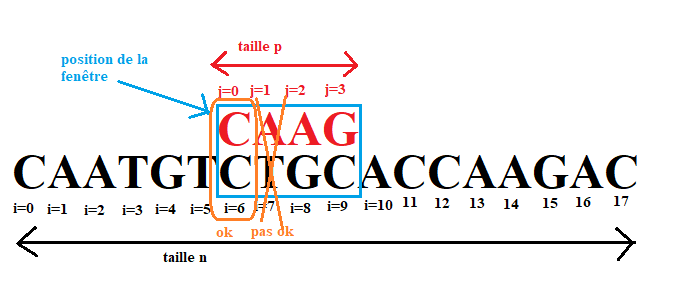

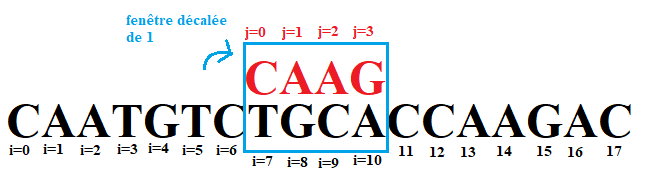

**<font color='orange'>💻 A vous de jouer 2 : compléter la fonction <code>cherche(texte, motif)</code> </font>**


In [ ]:
# Correction
def cherche(texte, motif):
    n = len(texte)
    p = len(motif)
    i = 0
    while i+p <= n:
        (ok, decalage) = correspondance(texte, motif, i)
        if ok == True:
            return i
        else:
            i = i + decalage
    return -1

In [ ]:
texte = 'CAATGTCTGCACCAAGAC'
motif = 'CAAG'
assert(cherche(texte, motif) == 12)
assert(cherche(texte, 'BB') == -1)

### c) Complexité dans le pire des cas

Le pire des cas a lieu : 
- quand on est obligé de faire passer la fenêtre par tous les indices $i$ de l’intervalle $[ 0, n-p [$ 
- et si en plus, pour chaque position $i$ de la fenêtre, on doit comparer tous les caractères du motif au texte, c’est-à-dire si $j$ varie dans tout 
l’intervalle $[ 0, p [$.


**<font color='blue'>C'est le cas par exemple quand on recherche le motif 'aaaab' dans le texte 'aaaaaaaaaaaaaaaaaaaa'</font>**

**<font color='blue'>Pour chaque tour dans la boucle (et il y en a $n-p$), on fait appel à la fonction <code>correspondance</code> qui fait $p$ comparaisons.  
La complexité est donc de l'ordre de $np - p^2$</font>.**


### d) Mesure du temps de calcul

On va reprendre ici le texte du roman *Le rouge et le noir* utilisé à la partie 1, et comparer les temps de recherche entre la fonction intégrée <code>find</code> de Python et notre fonction <ode>cherche</code>. (Se reporter au TP1)

In [ ]:
fichier = open('pg798.txt', 'r', encoding = 'utf-8')
stendhal = fichier.read()
fichier.close()

Pour mesurer le temps d'exécution d'un programme, on peut utiliser la fonction <code>timeit()</code> du module *timeit*. 

Nous allons chercher :  "Mme de Rênal fut fidèle à sa promesse" dans la variable `stendhal`. 

In [ ]:
from timeit import timeit

def recherche_find(livre, texte):
    return livre.find(texte)

def recherche_naive(livre, texte):
    return cherche(livre, texte )

livre = stendhal
texte = 'Mme de Rênal fut fidèle à sa promesse'

temps_find = timeit("recherche_find(livre, texte)", number=10, globals=globals())
temps_naif = timeit("recherche_naive(livre, texte)", number=10, globals=globals())
print("Temps en utilisant find : ",temps_find)
print("Temps en utilisant l'algorithme naif : ",temps_naif)


Temps en utilisant find :  0.008367913999791199
Temps en utilisant l'algorithme naif :  6.900285576999522


### 😭 Et dans le pire des cas ?

**<font color='orange'>💻 A vous de jouer 3 : </font>**  
construisez un texte (très long ! un million de caractères - tous identiques- par exemple) et un motif (assez long lui aussi ! Mettons mille caractères - les mêmes plus un caractère différent à la fin-) correspondant au pire des cas, et relancez la comparaison des deux temps de calcul.  
Vous verrez c'est assez long... Vous pourrez vous limiter à éxécuter seulement deux fois chaque fonction.

In [ ]:
texte_pire = 'A'*10**6
motif_pire = 'A'*10*3+'B'
temps_find = timeit("recherche_find(texte_pire, motif_pire)", number=2, globals=globals())
temps_naif = timeit("recherche_naive(texte_pire, motif_pire)", number=2, globals=globals())
print("Temps en utilisant find : ",temps_find)
print("Temps en utilisant l'algorithme naif : ",temps_naif)


Temps en utilisant find :  0.002004165000471403
Temps en utilisant l'algorithme naif :  7.827640505999625
